# Capstone Project - Automatic Ticket Assignment

### Background

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the
above Objective. An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

#### BusinessDomain Value

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

### Project Objectives

The objective of the project is,
- Learn how to use different classification models.
- Use transfer learning to use pre-built models.  Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc.
- Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

#### Dataset
https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

### Import Required Libraries

#### Installing packages which are not available out of the box on Google Collab


In [1]:
pip install googletrans


     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 952kB 16.4MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=8df55e76c1875f005a09380043d3e94ef6d0c2c42d879a6bb8fdf3281756d83b
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=3b3877ad7a6cf8349d7b373633ab0cd8d14d5fd23fabc2e02a87b6eb0d437902
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [2]:
pip install scattertext

     |████████████████████████████████| 7.2MB 3.6MB/s 


In [3]:
pip install TextBlob

#### Importing various Packages needed for this notebook

In [4]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
import warnings
warnings.filterwarnings('ignore')
random_seed=22
import time
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
wn = nltk.WordNetLemmatizer()
from nltk.corpus import stopwords
from wordcloud import WordCloud
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

from scattertext import CorpusFromPandas, produce_scattertext_explorer
from IPython.display import IFrame
from IPython.core.display import display, HTML
from urllib.request import urlopen

import scattertext as st
import spacy
import en_core_web_sm

from googletrans import Translator

from gensim.models import Word2Vec

from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

pd.set_option('display.width', -1)

import tqdm
from tqdm import tqdm

from tensorflow.keras import optimizers, backend
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from tensorflow.keras.initializers import Constant
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# using TextBlob.correct() method  https://textblob.readthedocs.io/en/dev/quickstart.html
#from textblob import TextBlob 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
project_path=os.getcwd()
project_path='/content/drive/My Drive/Projects/'
#project_path='/Users/devchoud/Documents/Personal-Mac/ML/GreatLakes/ML/NLP/capstone-proj-github/CapstoneAutoTicketClassifier/'
#project_path="F:\\StudyProject\\Projects\\Final_Team_project\\"

print(project_path)


/content/drive/My Drive/Projects/


In [10]:
### Generic function to clean the DataFrame of extra columns due to loading CSV files
def csvextracol(df):
  for col in df.columns:
    if col.startswith('Unnamed:'):
      df.drop([col],axis=1,inplace=True)

### set this parameter to replace resources saved on filesystem
############################################################################################
RUN_TRANSLATION ='N'  # Run translate1 (translation) and save the data to filesystem after the run. If set to "N" the previousily saved file project_path+'data/translated_dataset.csv' will be used
RUN_CLEANUP     ='N'  # Run cleantext and save the data to filesystem after the run. If set to "N" the previousily saved file project_path+'data/eda_final_dataset.csv'' will be used
SAVE_W2VECMODEL ='Y' #saving the word2vec model
RUN_AUG_AGAIN   ='N' # This is running the Data augmentation
USE_AUG_DF      ='Y' # This is if you want to use the freshly / previously saved augmented data or non augmented datasets.
RUN_ML_MODELS   ='Y'
############################################################################################

In [11]:
#Read the data into data frame
df_master = pd.read_excel(project_path+'data/input_data.xlsx',encoding='utf8')
df_master.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [12]:
df_master.loc[6673]

Short description    lorw8327797sf(usa robot):outlook did not compl...
Description          lorw8327797sf(usa robot):outlook did not compl...
Caller                                               jloygrwh acvztedi
Assignment group                                                 GRP_8
Name: 6673, dtype: object

### Exploratory Data Analysis

In [13]:
#Shape of the Data Frame
df_master.shape

(8500, 4)

In [14]:
#Data type of each attribute
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [15]:
#Lets find if there are any NaN values in the dataset
(df_master.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [16]:
## there are 2950 unique callers/Ticket loggers in the data.
df_master.Caller.value_counts().count()

2950

#### Observation

- Dataset has 8500 Documents (records) and 4 features(columns),  74 uniqe labels. 
- there are 8 titles and 1 description is null.
- there are 2950 unique ticket loggers.
- Dataset is highly imbalanced and skewed! Around 46% of the dataset is represented by just one class GRP_0. There are many classes that hardly have 1 datapoint. We would need to upsample the under represented class and downsample the strongly represented classes.
- We have 74 classes. There are few classes with very few tickets. It might make sense to consider only those categories with atleast 20 representations;Else our noise levels will be high.

In [17]:
#Merging the Short Description & Description columns
df_master['MergedTitleWithDescription'] = df_master['Short description'].str.cat(df_master['Description'], sep=' ', na_rep=' ')
df_master.drop('Short description', axis=1,inplace=True)
df_master.fillna(value='xx' ,inplace=True)


In [18]:
df_master.shape

(8500, 4)

In [19]:
## creating a list of callers to remove it from the data as it is not relevant to further processing.
df_caller=df_master[['Caller']].copy()

In [20]:
df_caller.head(1)

,Caller
0,spxjnwir pjlcoqds


In [21]:
## Making a list of callers as single tokens to clean up the data later
callerlist=[]
for i in range(len(df_caller)):
  cl = df_caller.Caller.loc[i].split(' ')
  for word in cl:
    callerlist.append(word)

len(callerlist)

17000

In [22]:
## saving the list of callers to remove from the data
with open(project_path+'resources/callerlist.txt', 'wb') as fh:
  pickle.dump(callerlist, fh)

print('callerlist: ',len(callerlist))


callerlist:  17000


In [23]:
df_master['MergedWordCount'] = [len(desc.split(' ')) for desc in df_master['MergedTitleWithDescription']]
wordCount_before = df_master['MergedWordCount'].sum()

In [24]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  307616


### Data Pre-processing

### Translation preprocessing

#### Observations about Languages found in the Data.
1. Based on the manual validation it was decided to re-mark some of the records to a particular language.
2. tode - is the set of records marked as some other language but found to be German, includes records which are detected correctly as german.
3. replacement_de_text.csv is used to translate strings which didn't get converted by googletrans.
4. tocn - set of records which were found to be chinese but detected as some other lang by langdetect.
5. replacement_cn_text.csv is used to translate strings which didn't get converted by googletrans.
6. topt - set of records which were actually portuguese but detected to be english or some other lang.
7. Also resetting all other records to English language as per above mentioned discussion.








In [25]:
# Langdetect was used to first detect the language and then run Googletrans to translate the non engiish detected text.
#
#from langdetect import detect
#data_df['desc_lang'] = data_df['desc_combined'].apply(lambda x: detect(x))
#if detect(data_df.desc_combined.loc[i])!='en':
   #translator=Translator(to_lang='en')
   #text = translator.translate(data_df.desc_combined.loc[i])
   #print(data_df.desc_combined[i],'------>',text)
   #print(data_df.desc_lang.loc[i],data_df.desc_combined.loc[i])

## As the results were nearly the same with no visible improvement over the accuracy of the detection, hence, we started with direct call to Googletrans over entire dataset.

##### Creating an empty column to hold the translated text

In [26]:
if RUN_TRANSLATION=='Y':
  df_master['Translated'] = ''
  df_master['lang'] =''
else:
  df_master=pd.read_csv(project_path+'data/translated_dataset.csv')
  csvextracol(df_master)


###### Using Googletrans library to convert the text based on the source language identify above

In [27]:
## using tqdm library to visualize the progress of the translation

import tqdm
from tqdm import tqdm

def translate1(min,max):
  translator = Translator()
  for i in tqdm(range(min,max)):
    inp=df_master.MergedTitleWithDescription.loc[i]
# limitation of googletrans on the buffer lenght    
    if len(inp)>11999:
      inp=inp[0:11999]
    val = translator.translate(inp)
    df_master.Translated.loc[i]=val.text
    df_master.lang.loc[i]=val.src


In [28]:
## calling the translate function. Takes 28mins to process on Google Collab
### allowing for a range of rows to be called as the function times out sometimes. This allows us to restart the translation from where it failed.
if RUN_TRANSLATION=='Y':
  translate1(0,len(df_master))


100%|██████████| 8500/8500 [29:38<00:00,  4.78it/s]


In [29]:
## replacing the CN text with english translation.
if RUN_TRANSLATION=='Y':
  df_cn_translated=pd.read_csv(project_path+'resources/replacement_cn_text.csv')
  csvextracol(df_cn_translated)
  for i in range(len(df_cn_translated)):
      ids=df_cn_translated.id.loc[i]
      df_master.Translated.loc[ids]=df_cn_translated.text.loc[i]
      df_master.lang.loc[ids]='cn'

  ## replacing the DE text with english translation.
  df_de_translated=pd.read_csv(project_path+'resources/replacement_de_text.csv')
  csvextracol(df_de_translated)
  for i in range(len(df_de_translated)):
      ids=df_de_translated.id.loc[i]
      df_master.Translated.loc[ids]=df_de_translated.text.loc[i]   
      df_master.lang.loc[ids]='de'


In [30]:
### validated list of Language to overcome some misdetection of Language
if RUN_TRANSLATION=='Y':
  tode=[255,305,441,450,453,997,1157,1158,1429,1552,1770,2186,2187,2383,2405,
  2928,2934,3571,4071,4716,4877,4963,4981,5229,5293,5300,5570,5571,5717,5814,
  5999,6314,6342,6506,6507,6993,6994,7120,7121,7445,7564,7836,8242,8284,8324,
  8375,8396,8413]

  topt =[4147,4313,6405]

  tocn = [1081,1178,1271,1452,1700,1701,1704,1710,1711,1954,1955,2004,2980,3007,
  3010,3120,3137,3315,3738,3903,4028,4054,4090,4098,4501,4502,4503,5146,5147,
  5149,5303,5310,5311,5489,5761,5913,6102,6106,6534,6535,7309,7314,7317,7582,
  7588,7941,7969,8471,7732,164,4908,7264]
      
  rlanglist=['co','gl','is','af','it','fr','sv','nl','tr','fy','no','es','ca','da','pl','ro','cy','tl','sq','vi','sl','hr','id','fi','et','hu','lv','cs',
  'lt','so','co','lb','ht','gu']
  #rlanglist=['de','en','pt','cn']
      
  df_master.loc[df_master.index.isin(tode),'lang'] = 'de'
  df_master.loc[df_master.index.isin(topt),'lang'] = 'pt'
  df_master.loc[df_master.index.isin(tocn),'lang'] = 'cn'
  df_master.lang[~df_master.lang.isin(['de','pt','cn','en'])]='en'

In [31]:
df_master.lang.value_counts()

en    8099
de     339
cn      52
pt      10
Name: lang, dtype: int64

##### Validation of the translation. A few rows are not getting translated and they will be ignored as they already have some english words which can be used.

In [32]:
### List of rows which cannot be translated.
if RUN_TRANSLATION=='Y':
  x = 0
  y = 0
  totrl =[]
  for i in tqdm(range(len(df_master))):
      if (df_master.MergedTitleWithDescription.loc[i]==df_master.Translated.loc[i]) and ((df_master.lang.loc[i]!='en') and (df_master.lang.loc[i]!='cn')):
          #print(i,' [ ',df_master.lang.loc[i],' ] ',df_master.MergedTitleWithDescription.loc[i],'====>',df_master.Translated.loc[i],'*****')
          totrl.append(i)
          x=x+1
  print('Ids to translate : ' ,totrl)
  if x> 0:
    print('Translating no of records : ',x)
    for i in range(len(totrl)):
      val=totrl[i]
      print('To Translate : ',val,df_master['Assignment group'].loc[val],df_master.MergedTitleWithDescription.loc[val],'=====>',df_master.lang.loc[val],'= = =>',df_master.Translated.loc[val])
      translate1(val,val+1)
      print('Translated : ',val,df_master['Assignment group'].loc[val],df_master.MergedTitleWithDescription.loc[val],'=====>',df_master.lang.loc[val],'= = =>',df_master.Translated.loc[val])




  0%|          | 0/1 [00:00<?, ?it/s]

Ids to translate :  [305, 997, 1429, 1552, 2187, 2405, 2928, 2934, 3571, 4313, 4716, 4877, 4963, 5999, 6506, 6507, 6994, 7120, 8284, 8375, 8396]
Translating no of records :  21
To Translate :  305 GRP_24 probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp =====> de = = => probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  305 GRP_24 probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp =====> en = = => probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzrgyunp
To Translate :  997 GRP_24 probleme mit login in br \usalikfj lfmpxbcn probleme mit login in br \usalikfj lfmpxbcn =====> de = = => probleme mit login in br \usalikfj lfmpxbcn probleme mit login in br \usalikfj lfmpxbcn


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  997 GRP_24 probleme mit login in br \usalikfj lfmpxbcn probleme mit login in br \usalikfj lfmpxbcn =====> en = = => probleme mit login in br \usalikfj lfmpxbcn probleme mit login in br \usalikfj lfmpxbcn
To Translate :  1429 GRP_33 telefon defekt telefon defekt =====> de = = => telefon defekt telefon defekt
Translated :  1429 GRP_33 telefon defekt telefon defekt =====> sv = = => phone defective phone defective
To Translate :  1552 GRP_24 probleme mit lan \youfzmgp xvysrnmb probleme mit lan \youfzmgp xvysrnmb =====> de = = => probleme mit lan \youfzmgp xvysrnmb probleme mit lan \youfzmgp xvysrnmb


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  1552 GRP_24 probleme mit lan \youfzmgp xvysrnmb probleme mit lan \youfzmgp xvysrnmb =====> de = = => problems with lan \ youfzmgp xvysrnmb problems with lan \ youfzmgp xvysrnmb
To Translate :  2187 GRP_24 monitor vom rfa-analysegerÃ¤t defekt hallo ,

kannst du mal bei uns im labor vorbei schauen, da ist der monitor vom rfa-analysegerÃ¤t defekt.

rclqfpgt tbnovxdp ist der ansprechpartner.

 =====> de = = => monitor vom rfa-analysegerÃ¤t defekt hallo ,

kannst du mal bei uns im labor vorbei schauen, da ist der monitor vom rfa-analysegerÃ¤t defekt.

rclqfpgt tbnovxdp ist der ansprechpartner.




  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  2187 GRP_24 monitor vom rfa-analysegerÃ¤t defekt hallo ,

kannst du mal bei uns im labor vorbei schauen, da ist der monitor vom rfa-analysegerÃ¤t defekt.

rclqfpgt tbnovxdp ist der ansprechpartner.

 =====> de = = => monitor of rfa analyzer defective hello,

can you visit us in the laboratory, the monitor of the rfa analyzer is defective.

rclqfpgt tbnovxdp is the contact person.
To Translate :  2405 GRP_24 probleme mit ie \vzqomdgt jwoqbuml probleme mit ie \vzqomdgt jwoqbuml =====> de = = => probleme mit ie \vzqomdgt jwoqbuml probleme mit ie \vzqomdgt jwoqbuml
Translated :  2405 GRP_24 probleme mit ie \vzqomdgt jwoqbuml probleme mit ie \vzqomdgt jwoqbuml =====> de = = => problems with ie \ vzqomdgt jwoqbuml problems with ie \ vzqomdgt jwoqbuml
To Translate :  2928 GRP_24 probleme mit ie \niptbwdq csenjruz probleme mit ie \niptbwdq csenjruz =====> de = = => probleme mit ie \niptbwdq csenjruz probleme mit ie \niptbwdq csenjruz


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  2928 GRP_24 probleme mit ie \niptbwdq csenjruz probleme mit ie \niptbwdq csenjruz =====> de = = => problems with ie \ niptbwdq csenjruz problems with ie \ niptbwdq csenjruz
To Translate :  2934 GRP_24 probleme mit portal \acqpinyd ecygimqd probleme mit portal \acqpinyd ecygimqd =====> de = = => probleme mit portal \acqpinyd ecygimqd probleme mit portal \acqpinyd ecygimqd
Translated :  2934 GRP_24 probleme mit portal \acqpinyd ecygimqd probleme mit portal \acqpinyd ecygimqd =====> de = = => problems with portal \ acqpinyd ecygimqd problems with portal \ acqpinyd ecygimqd
To Translate :  3571 GRP_24 access point defekt .\jxphgfmb gjbtuwek access point defekt .\jxphgfmb gjbtuwek =====> de = = => access point defekt .\jxphgfmb gjbtuwek access point defekt .\jxphgfmb gjbtuwek


100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Translated :  3571 GRP_24 access point defekt .\jxphgfmb gjbtuwek access point defekt .\jxphgfmb gjbtuwek =====> en = = => access point defekt .\jxphgfmb gjbtuwek access point defekt .\jxphgfmb gjbtuwek
To Translate :  4313 GRP_62 instalar docad eletronico user: olghiveii

segue link



 =====> pt = = => instalar docad eletronico user: olghiveii

segue link




Translated :  4313 GRP_62 instalar docad eletronico user: olghiveii

segue link



 =====> pt = = => install electronic docad user: olghiveii

follow link
To Translate :  4716 GRP_24 probleme mit accespoint \konferenzraum f&e \niptbwdq csenjruz probleme mit accespoint \konferenzraum f&e \niptbwdq csenjruz =====> de = = => probleme mit accespoint \konferenzraum f&e \niptbwdq csenjruz probleme mit accespoint \konferenzraum f&e \niptbwdq csenjruz


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  4716 GRP_24 probleme mit accespoint \konferenzraum f&e \niptbwdq csenjruz probleme mit accespoint \konferenzraum f&e \niptbwdq csenjruz =====> de = = => problems with access point \ conference room r & e \ nipt wdq csenjruz problems with access point \ conference room f & e \ niptbwdq csenjruz
To Translate :  4877 GRP_24 kabel vga defekt\ zedlet  kabel vga defekt\ zedlet  =====> de = = => kabel vga defekt\ zedlet  kabel vga defekt\ zedlet 
Translated :  4877 GRP_24 kabel vga defekt\ zedlet  kabel vga defekt\ zedlet  =====> fy = = => cable vga defective \ banknote cable vga defective \ banknote
To Translate :  4963 GRP_0 lizenz  let's talk- video kann nicht geÃ¶ffnet werden =====> de = = => lizenz  let's talk- video kann nicht geÃ¶ffnet werden


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  4963 GRP_0 lizenz  let's talk- video kann nicht geÃ¶ffnet werden =====> de = = => license let's talk video cannot be opened
To Translate :  5999 GRP_0 dmitazhw kxbifzoh : lock out  dmitazhw kxbifzoh : lock out 
mii system =====> de = = => dmitazhw kxbifzoh : lock out  dmitazhw kxbifzoh : lock out 
mii system
Translated :  5999 GRP_0 dmitazhw kxbifzoh : lock out  dmitazhw kxbifzoh : lock out 
mii system =====> en = = => dmitazhw kxbifzoh : lock out  dmitazhw kxbifzoh : lock out 
mii system
To Translate :  6506 GRP_24 probleme mit erpgui \sqlmtixr urhbvfgd probleme mit erpgui \sqlmtixr urhbvfgd =====> de = = => probleme mit erpgui \sqlmtixr urhbvfgd probleme mit erpgui \sqlmtixr urhbvfgd


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  6506 GRP_24 probleme mit erpgui \sqlmtixr urhbvfgd probleme mit erpgui \sqlmtixr urhbvfgd =====> de = = => problems with erpgui \ sqlmtixr urhbvfgd problems with erpgui \ sqlmtixr urhbvfgd
To Translate :  6507 GRP_24 probleme mit java \xmlbfjpg yegzbvru probleme mit java \xmlbfjpg yegzbvru =====> de = = => probleme mit java \xmlbfjpg yegzbvru probleme mit java \xmlbfjpg yegzbvru
Translated :  6507 GRP_24 probleme mit java \xmlbfjpg yegzbvru probleme mit java \xmlbfjpg yegzbvru =====> de = = => problems with java \ xmlbfjpg yegzbvru problems with java \ xmlbfjpg yegzbvru
To Translate :  6994 GRP_24 monitor defekt \ewew8323542 \pvd1 \bur am orde monitor defekt \ewew8323542 \pvd1 \bur am orde =====> de = = => monitor defekt \ewew8323542 \pvd1 \bur am orde monitor defekt \ewew8323542 \pvd1 \bur am orde


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  6994 GRP_24 monitor defekt \ewew8323542 \pvd1 \bur am orde monitor defekt \ewew8323542 \pvd1 \bur am orde =====> en = = => monitor defekt \ewew8323542 \pvd1 \bur am orde monitor defekt \ewew8323542 \pvd1 \bur am orde
To Translate :  7120 GRP_24 probleme mit lan \ewew8323735 \xwirzvda okhyipgr probleme mit lan \ewew8323735 \xwirzvda okhyipgr =====> de = = => probleme mit lan \ewew8323735 \xwirzvda okhyipgr probleme mit lan \ewew8323735 \xwirzvda okhyipgr


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  7120 GRP_24 probleme mit lan \ewew8323735 \xwirzvda okhyipgr probleme mit lan \ewew8323735 \xwirzvda okhyipgr =====> de = = => problems with lan \ ewew8323735 \ xwirzvda okhyipgr problems with lan \ ewew8323735 \ xwirzvda okhyipgr
To Translate :  8284 GRP_6 abended job in job_scheduler: snp_heu_1_regen received from: monitoring_tool@company.com

 abended job in job_scheduler: snp_heu_1_regen at 08/07/16 06:13:25 =====> de = = => abended job in job_scheduler: snp_heu_1_regen received from: monitoring_tool@company.com

 abended job in job_scheduler: snp_heu_1_regen at 08/07/16 06:13:25


  0%|          | 0/1 [00:00<?, ?it/s]

Translated :  8284 GRP_6 abended job in job_scheduler: snp_heu_1_regen received from: monitoring_tool@company.com

 abended job in job_scheduler: snp_heu_1_regen at 08/07/16 06:13:25 =====> en = = => abended job in job_scheduler: snp_heu_1_regen received from: monitoring_tool@company.com

 abended job in job_scheduler: snp_heu_1_regen at 08/07/16 06:13:25
To Translate :  8375 GRP_0 vlinspectkiosk2 qlhmawgi sgwipoxn locked vlinspectkiosk2 qlhmawgi sgwipoxn locked =====> de = = => vlinspectkiosk2 qlhmawgi sgwipoxn locked vlinspectkiosk2 qlhmawgi sgwipoxn locked
Translated :  8375 GRP_0 vlinspectkiosk2 qlhmawgi sgwipoxn locked vlinspectkiosk2 qlhmawgi sgwipoxn locked =====> en = = => vlinspectkiosk2 qlhmawgi sgwipoxn locked vlinspectkiosk2 qlhmawgi sgwipoxn locked
To Translate :  8396 GRP_62 formatar micro formatar micro =====> de = = => formatar micro formatar micro


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]

Translated :  8396 GRP_62 formatar micro formatar micro =====> pt = = => format micro format micro


In [33]:
if RUN_TRANSLATION=='Y':
  df_master.lang[~df_master.lang.isin(['de','pt','cn','en'])]='en'
  df_master.to_csv(project_path+'data/translated_dataset.csv')

#### Distribution of Language data in the dataset

##### Distribution of Language in the dataset

In [34]:
## retrieving translated data from filesystem. This can be previously saved file or saved in this session

df_master=pd.read_csv(project_path+'data/translated_dataset.csv')
csvextracol(df_master)


In [35]:
#### Validation of the dataframe to check that most of the data is translated
df_master[['Translated','lang']].head(5)

,Translated,lang
0,login issue -verified user details.(employee# ...,en
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en
2,cant log in to vpn \r\n\r\nreceived from: eylq...,en
3,unable to access hr_tool page unable to access...,en
4,skype error skype error,en


In [36]:
print(df_master.lang.value_counts(normalize=True))


en    0.953882
de    0.038706
cn    0.006118
pt    0.001294
Name: lang, dtype: float64


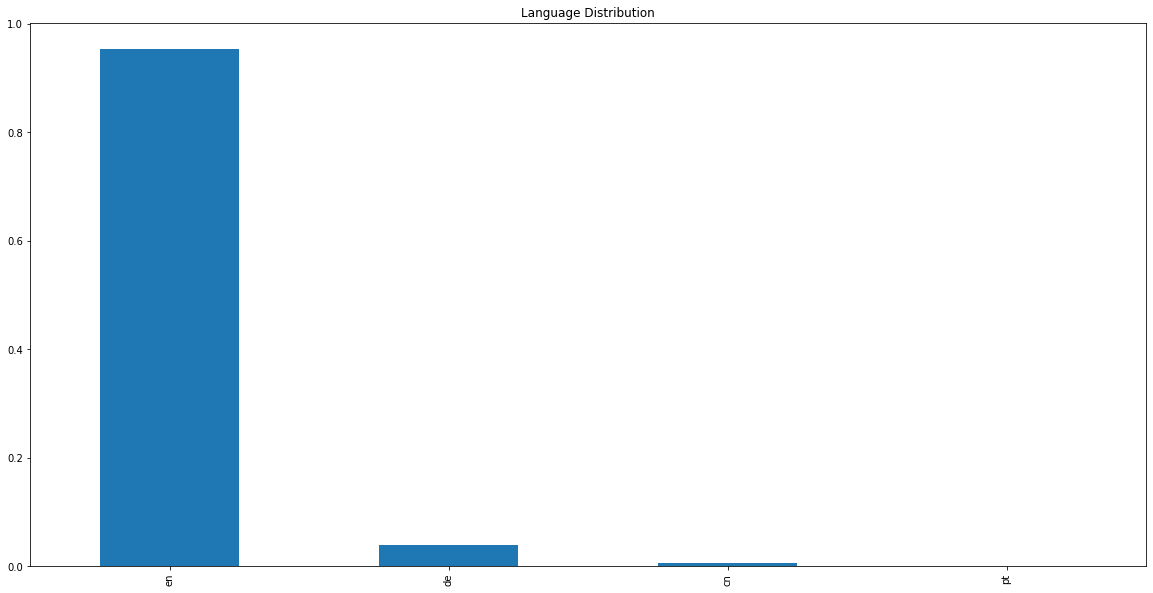

In [37]:
df_master['lang'].value_counts(normalize=True).plot(kind='bar', figsize=(20,10), title='Language Distribution')

##### Saving the translated data to filesystem to pick up from here and start as the translation fuunction is very time consuming

In [38]:
df_master.loc[np.random.randint(len(df_master))]

Description                   received from: monitoring_tool@company.com\r\n...
Caller                                                        bpctwhsn kzqsbmtp
Assignment group                                                          GRP_8
MergedTitleWithDescription    job bk_hana_SID_62_arc_dp failed in job_schedu...
MergedWordCount                                                              20
Translated                    job bk_hana_SID_62_arc_dp failed in job_schedu...
lang                                                                         en
Name: 4246, dtype: object

In [39]:
df_master.replace('NaN', np.nan, inplace = True)
df_master = df_master.dropna()

In [40]:
df_master.head(2)

,Description,Caller,Assignment group,MergedTitleWithDescription,MergedWordCount,Translated,lang
0,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue -verified user details.(employee# ...,en
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en


### Visualization

##### WordCould to visualize the most frequent tokens in the dataset.

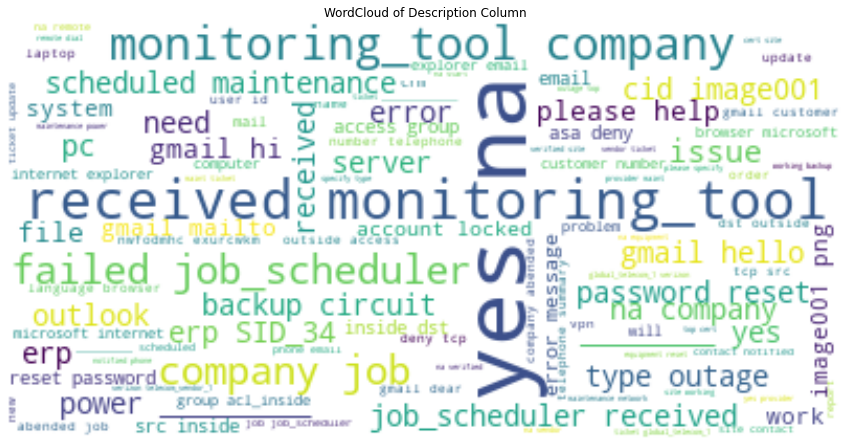

In [41]:
## WordCloud of Description Column
All_words = ""
All_words += " ".join(df_master.Description)
wordcloud = WordCloud(background_color='white'
#,include_numbers=True
).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description Column")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

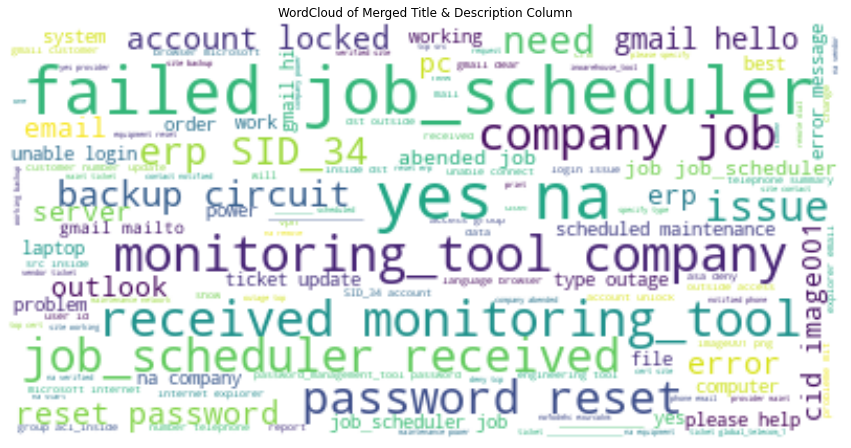

In [42]:
## WordCloud of Merged Title & Description Column
All_words = ""
All_words += " ".join(df_master.MergedTitleWithDescription)
wordcloud = WordCloud(background_color='white'
#, include_numbers=True
).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Merged Title & Description Column")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

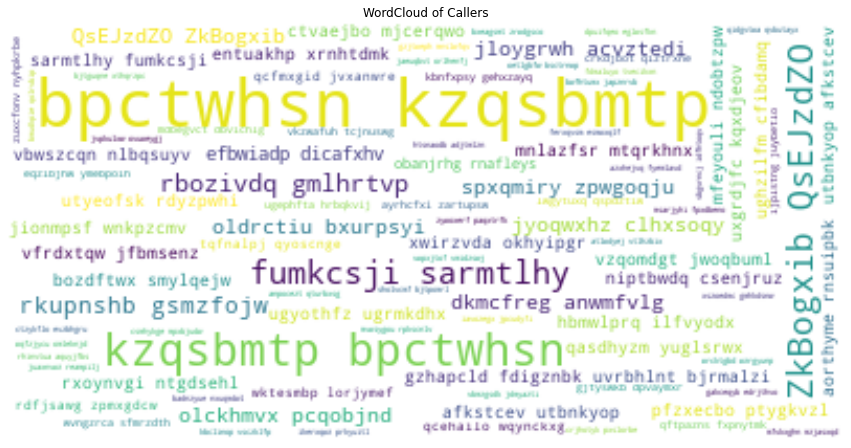

In [43]:
## WordCloud of Callers
All_callers = ""
All_callers += " ".join(df_master.Caller)
wordcloud = WordCloud(background_color='white'
#, include_numbers=True
).generate(All_callers) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Callers")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

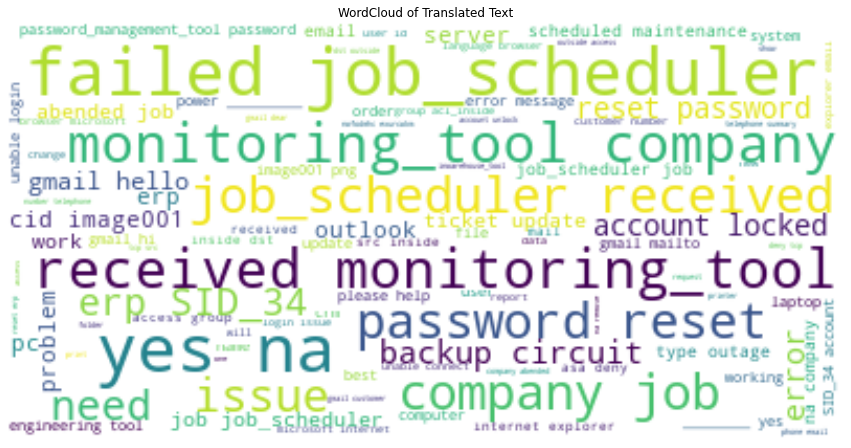

In [44]:
## WordCloud of Tranlsated Text
All_translated = ""
All_translated += " ".join(df_master.Translated)
wordcloud = WordCloud(background_color='white'
#, include_numbers=True
).generate(All_translated) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Translated Text")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

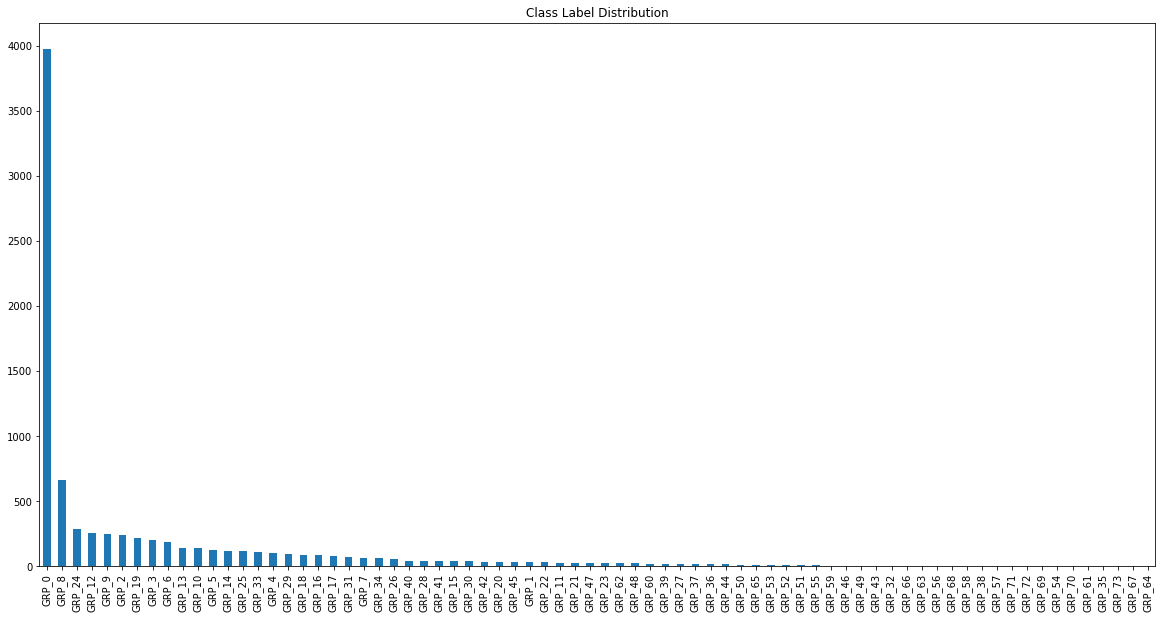

In [45]:
df_master['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

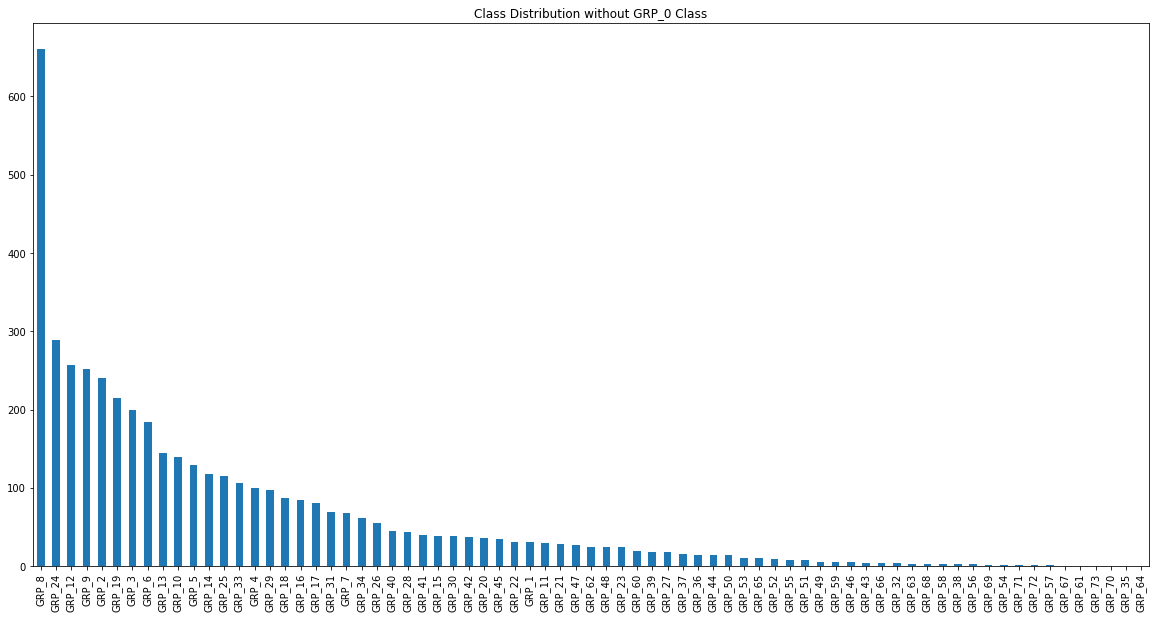

In [46]:
df_nozero=df_master[~df_master['Assignment group'].isin(['GRP_0'])]

df_nozero['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Distribution without GRP_0 Class')

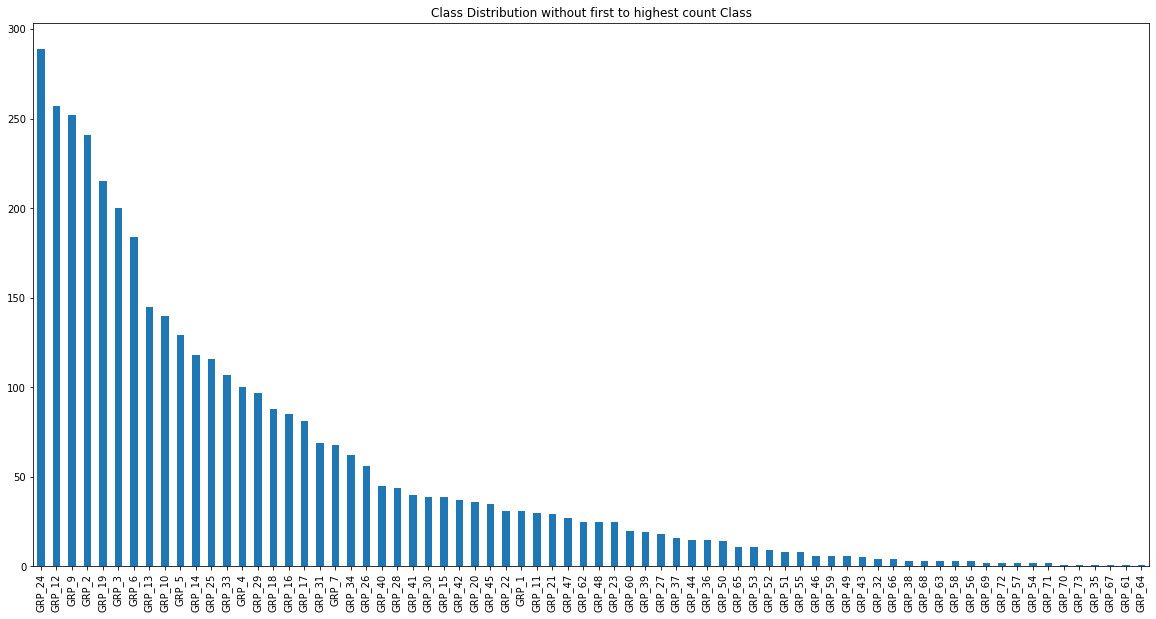

In [47]:
df_nozero8=df_master[~df_master['Assignment group'].isin(['GRP_0','GRP_8'])]

df_nozero8['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Distribution without first to highest count Class')

### Data Preprocessing

##### Various functions to clean the data

In [48]:
### regex function to clean up symbols and some patterns like emails, disclaimer, numbers, hostnames, urls, etc
def applyRegEx(dd):
    symbol = """!#$%^`&*();:\t\\\"!\{\}\[\]<>-\?\-\\\"—\.,1234567890"""
    dout=re.sub(' +', ' ' ,
                          re.sub('[^a-zA-z0-9\s]',' ',
                          re.sub("\_ ",' ',
                          re.sub("\\\\",' ',
                          re.sub('\\[a-zA-Z0-9]+',' ',
                          re.sub('(\__)+',' ',
                          re.sub('[{}]'.format(symbol),' ',  
                          re.sub('ü','u',
                          re.sub('ã','a',
                          re.sub('€','e',
                          re.sub('Â','a',
                          re.sub("\'ll", ' will',
                          re.sub("\'ve", ' have',
                          re.sub("\'s", ' is',
                          re.sub("doesn\'t",' does not', 
                          re.sub("cant\'t'",' cannot',       
                          re.sub("cant", ' cannot',
                          re.sub('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+',' ',
                          re.sub('[a-zA-Z0-9_.+-]+[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+',' ', 
                          re.sub('/[a-zA-Z0-9_.+-]+',' ',
                          #re.sub('\_[a-zA-Z0-9]+',' ',
                          #re.sub(' [a-zA-Z] ', ' ',
                          re.sub('\_[0-9]+',' ',       
                          #re.sub('([a-zA-Z0-9]+)\_([0-9]+)[a-zA-Z0-9]+',' ',
                          #re.sub('([a-zA-Z0-9]+)\_ ',' ',
                          re.sub("\(yes\/no\/na\)",' ',
                          re.sub("received from:",' ',
                          re.sub('\_\_([a-zA-Z0-9])\_\_',' ',
                          re.sub('diese mitteilung ist einzig und allein für die nutzung durch den adressaten bestimmt und kann informationen enthalten, die schutzwürdig, vertraulich oder nach geltendem recht von der offenlegung ausgenommen sind. die verbreitung, verteilung oder vervielfältigung dieser mitteilung durch personen, bei denen es sich nicht um die beabsichtigten empfänger handelt, ist streng verboten. wenn diese mitteilung aufgrund eines versehens bei ihnen eingegangen ist, dann benachrichtigen sie bitte den absender und löschen sie diese mitteilung.',' ',
                          re.sub('本通信は記載された人物のみを対象として使用されるものとし、特権的かつ機密情報を含み、適用される法律に基づいた情報開示から除外されるものとします。正当な受取人以外のいかなる第三者による本通信の配布、流通、再販は固く禁じられています。また本通信が誤って送信された場合は、送信者に連絡の上、本通信を削除してください。',' ',
                          re.sub('this communication is intended solely for the use of the addressee and may contain information that is worthy of protection, confidential or excluded from disclosure under applicable law. the distribution, distribution or reproduction of this communication by persons other than the intended recipients is strictly prohibited. if you have received this message by mistake, please notify the sender and delete this message.',' ',
                          re.sub('neste mensaje está destinado al uso exclusivo de la persona a quien está dirigido y puede contener información privilegiada, confidencial y que está exenta de ser revelada conforme con lo dispuesto en la legislación vigente. toda difusión, distribución o reproducción de este mensaje por parte de otra persona que no sea el receptor al que está destinado queda estrictamente prohibida. si recibe este mensaje por error, se ruega que lo notifique al remitente y borre este mensaje.',' ',
                          re.sub('select the following link to view the disclaimer in an alternate language.',' ',       
                          re.sub('company\/posts',' ',       
                          re.sub('[}/:\r\n]',' ',dd)))))))))))))))))))))))))))))))
    dout=dout.lower()
    return dout

#### NLP Essentials : Stopwords Removal & Text Normalization (Lemmetization)

##### Remove Stopwords
1. Text Classification
2. Spam Filtering
3. Language Classification
4. Genre Classification
5. Caption Generation
6. Auto-Tag Generation

##### Avoid Stopword Removal
1. Machine Translation
2. Language Modeling
3. Text Summarization
4. Question-Answering problems (Chatbots)

##### Importing lists which contain the words that we need to delete from dataset

In [49]:
### loading lists.
### Custom stopwords
pickle_off = open (project_path+"resources/custom_stopwords.txt", "rb")
custom_stopwords = pickle.load(pickle_off)
print('Stopwords : ',len(custom_stopwords))

### Callers list
pickle_off = open (project_path+"resources/callerlist.txt", "rb")
callerlist = pickle.load(pickle_off)
print('Callerlist : ',len(callerlist))

### Spelling corrections and separating merged words
pickle_off = open(project_path+"resources/toreplaceset.pickle", 'rb')
replacementset = pickle.load(pickle_off)
print('To Replace : ',len(replacementset))

### deleting non english words, junk words, etc
pickle_off = open (project_path+"resources/todeleteset.txt", "rb")
todeleteset = pickle.load(pickle_off)
print('To Delete : ',len(todeleteset))



Stopwords :  194
Callerlist :  17000
To Replace :  2484
To Delete :  6295


#### Various functions to clean the data

In [50]:
print("Clean up contains callerlist, replacement & delete list")
def cleantext(intext,debug):
  if debug=='Y':
    print('original ',intext)
  text=applyRegEx(intext)
  if debug=='Y':
    print('regex ',intext)
  text = [word for word in re.split(' ',text) if word not in callerlist]
  if debug=='Y':
    print('caller ',text)
  text =' '.join(text)
  text = [replacementset[word] if word in replacementset else word for word in text.split(" ")]
  if debug=='Y':
    print('replacement ',text)
  if debug=='Y':
    print('delete ',text)
  text =' '.join(text)
  text = [word for word in text.split(" ") if word not in custom_stopwords]
  if debug=='Y':
    print('stop ',text)
  text = [word for word in text if not word=='']
  if debug=='Y':
    print('empty ',text)
  text = [wn.lemmatize(word) for word in text]
  if debug=='Y':
    print('lemat ',text)
  text = " ".join([word for word in text if not len(word)<3])
  if debug=='Y':
    print('small ',text)
  return text
  


Clean up contains callerlist, replacement & delete list


In [51]:
## validation of the cleantext function
txt=df_master.Translated.loc[34]
cleantext(txt,'Y')

original  unable to install flash player unable to install flash player
regex  unable to install flash player unable to install flash player
caller  ['unable', 'to', 'install', 'flash', 'player', 'unable', 'to', 'install', 'flash', 'player']
replacement  ['unable', 'to', 'install', 'flash', 'player', 'unable', 'to', 'install', 'flash', 'player']
delete  ['unable', 'to', 'install', 'flash', 'player', 'unable', 'to', 'install', 'flash', 'player']
stop  ['unable', 'install', 'flash', 'player', 'unable', 'install', 'flash', 'player']
empty  ['unable', 'install', 'flash', 'player', 'unable', 'install', 'flash', 'player']
lemat  ['unable', 'install', 'flash', 'player', 'unable', 'install', 'flash', 'player']
small  unable install flash player unable install flash player


'unable install flash player unable install flash player'

#### Calling various functions sequentially to clean the data

In [62]:

if RUN_CLEANUP=='Y':
  cleaned_df_master = df_master.copy()
  cleaned_df_master['final_text']=''
  #all cleaning functions applied to the dataset
  cleaned_df_master['final_text'] = cleaned_df_master['Translated'].apply(lambda x: cleantext(x,'N'))
  print('Clean up done....')


##### Removing duplicates created usually after Lemmatization

In [63]:
if RUN_CLEANUP=='Y':
  #Remove the duplicates 
  dups_across_groups = cleaned_df_master[cleaned_df_master.duplicated(['final_text'],keep='first')]
  print('Duplicates found :' ,len(dups_across_groups))
  cleaned_df_master.drop_duplicates(['final_text'],keep='first',inplace=True)
  print('Shape of the dataset : ',cleaned_df_master.shape)
  print('Duplicates removed....')


Duplicates found : 1935
Shape of the dataset :  (6565, 8)


In [81]:
if RUN_CLEANUP=='Y':
  #Final data frame to be used for model building.
  cleaned_df_master.rename(columns={'Assignment group': 'Group'}, inplace=True)
  df_master_final = cleaned_df_master[['final_text', 'Group']].copy()
  df_master_final.replace('NaN', np.nan, inplace = True)
  df_master_final = df_master_final.dropna()
  df_master_final.reset_index(inplace=True,drop=True)
  df_master_final.head(2)
  print('Reindexing done...')
  df_master_final.to_csv(project_path+'data/eda_final_dataset.csv')
  print("saved file ...")
  print('Shape of datafile : ',df_master_final.shape)

Reindexing done...
saved file ...
Shape of datafile :  (6565, 2)


#### Cleaned Dataframe to be used for further processing, columns of interest final_text & Group

In [84]:
## reading back the saved file....

print('Reading saved file....')
df_master_final=pd.read_csv(project_path+'data/eda_final_dataset.csv')
csvextracol(df_master_final)
## Validating & deleting nulls in the data
df_master_final.replace('NaN', np.nan, inplace = True)
df_master_final = df_master_final.dropna()
df_master_final.reset_index(inplace=True,drop=True)
print('Shape of the dataframe : ',df_master_final.shape)


Reading saved file....
Shape of the dataframe :  (6564, 2)


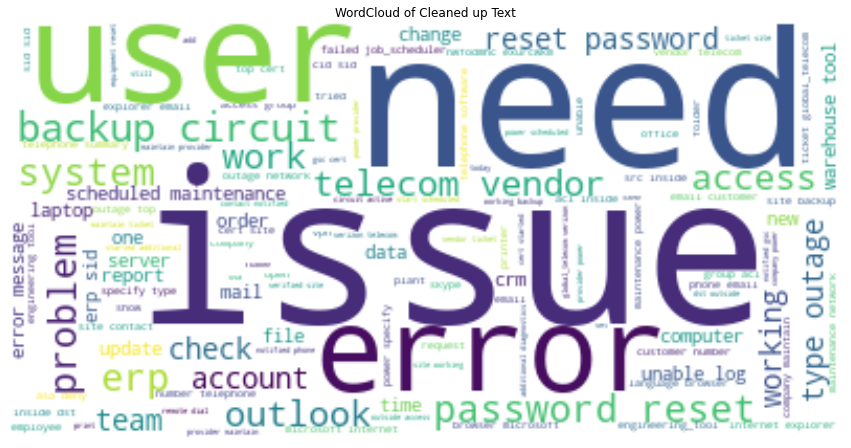

In [87]:
## WordCloud of Cleaned up text
All_cleaned = ""
All_cleaned += " ".join(df_master_final.final_text)
wordcloud = WordCloud(background_color='white'
#, include_numbers=True
).generate(All_cleaned) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned up Text")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Building corpus to check on the number of words in the dataset

In [88]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['final_text']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(df_master_final)  
## Checking on the tokens      
corpus[0:1]

[['log',
  'issue',
  'verified',
  'user',
  'detail',
  'employee',
  'manager',
  'name',
  'checked',
  'user',
  'name',
  'reset',
  'password',
  'advised',
  'user',
  'log',
  'check',
  'caller',
  'confirmed',
  'able',
  'log',
  'issue',
  'resolved']]

#### Using T-SNE library to visualize the data in lower dimensions & to carry out PCA

In [89]:
### creating Tsne plots

def tsne_plot(model):
    "Creates and TSNE Model and Plots"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

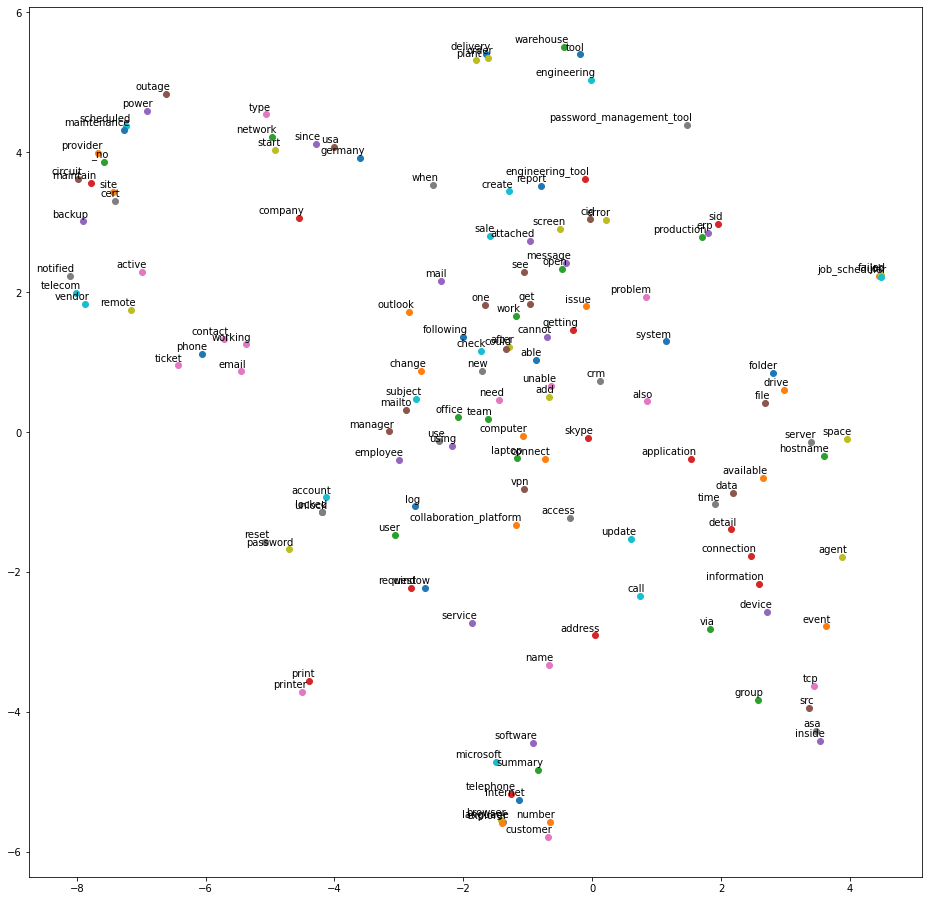

In [90]:
#### Plot of Words with minimum frequency of 200
model = Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
tsne_plot(model)

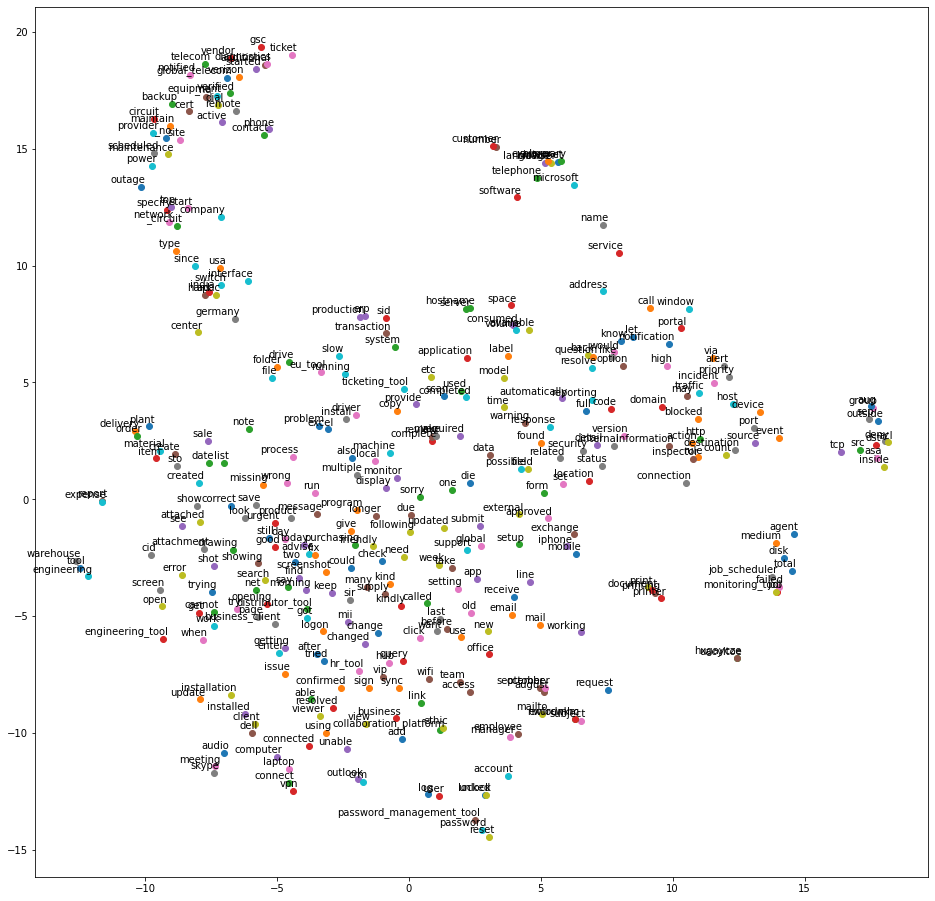

In [91]:
#### Plot of Words with minimum frequency of 75
model = Word2Vec(corpus, size=500, window=30, min_count=75, workers=4)
tsne_plot(model)

#### Checking the Word2vec Similarity vectors

In [92]:
model.most_similar('problem')

[('document', 0.8841874599456787),
 ('print', 0.8599875569343567),
 ('printer', 0.8408718705177307),
 ('excel', 0.8317301869392395),
 ('printing', 0.8130657076835632),
 ('note', 0.7892487049102783),
 ('make', 0.7511916160583496),
 ('copy', 0.7508366107940674),
 ('review', 0.7393925786018372),
 ('complete', 0.7289565801620483)]

In [93]:
model.most_similar('password')

[('password_management_tool', 0.9523319005966187),
 ('reset', 0.8889610171318054),
 ('changed', 0.8738611936569214),
 ('click', 0.8391152024269104),
 ('unlock', 0.8303577899932861),
 ('locked', 0.7993186712265015),
 ('want', 0.7872588634490967),
 ('log', 0.7741039991378784),
 ('confirmed', 0.7529144883155823),
 ('manager', 0.745926022529602)]

In [94]:
model.most_similar('back')

[('question', 0.9725085496902466),
 ('resolve', 0.9222431778907776),
 ('like', 0.8821777105331421),
 ('automatically', 0.8730535507202148),
 ('would', 0.8646295666694641),
 ('ticket', 0.8477455973625183),
 ('option', 0.8375213146209717),
 ('gsc', 0.8340606689453125),
 ('know', 0.8114820718765259),
 ('notification', 0.8044663667678833)]

## Start of tokenization, embedding , vector building for Machine Learning model creation and development

In [95]:
### Loading saved csv file with cleaned data
df_master_final = pd.read_csv(project_path+"data/eda_final_dataset.csv")
csvextracol(df_master_final)
df_master_final.head(1)

,final_text,Group
0,log issue verified user detail employee manage...,GRP_0


In [96]:
# Number of Classes in the dataset
grp_dist = df_master_final['Group'].value_counts()
print(len(grp_dist))

74


In [97]:
# Number of records belonging to every class
assignment_grps = df_master_final.groupby('Group')
assignment_grps.size()

Group
GRP_0     3050
GRP_1       27
GRP_10      80
GRP_11      30
GRP_12     238
          ... 
GRP_71       2
GRP_72       1
GRP_73       1
GRP_8      305
GRP_9       77
Length: 74, dtype: int64

### Paring down the dataset
#### It is found that there are few classes with very few records. Using such class records severely impacts the performance of the model.
###### The following code tries to identify the reduction in data based on various threshold

In [98]:
#Choosing a threshold of the number of records to present for any group
#Vary the threshold to check the number of entries that remain after the filtering
num_entries_org = df_master_final.shape[0]
THRESH = [1, 10, 25, 50, 75, 100]
num_records = []
num_classes = []
percent_reduction_records = []

for t in THRESH:
    df_filtered = df_master_final.groupby('Group').filter(lambda x: len(x) >= t)
    groups = df_filtered.groupby('Group')
    num_records.append(df_filtered.shape[0])
    num_classes.append(len(groups.size()))
    percent_red = (num_entries_org - num_records[-1]) / (num_entries_org*1.0)
    percent_reduction_records.append(round(percent_red*100))
    
print("Threshold")
print("="*32)
print(THRESH)

print("\nNumber of Records")
print("="*32)
print(num_records)

print("\nPercentage Reduction")
print("="*32)
print(percent_reduction_records)

print("\nNumber of Classes")
print("="*32)
print(num_classes)


Threshold
[1, 10, 25, 50, 75, 100]

Number of Records
[6565, 6472, 6273, 5776, 5461, 4947]

Percentage Reduction
[0, 1, 4, 12, 17, 25]

Number of Classes
[74, 48, 36, 22, 17, 11]


#### Decision : It was decided that we will go with classes which have a minimum of 50 rows in them. This leads to a reduction of 11% of the Data

- Lets try with thresholds of 50 and 100.
- Selecting a threshold of 50 gives us 22 classes with 11% reduction in sample size.
- Selecting a threshold of 100 gives us 11 classes with 24% reduction in sample size.

In [99]:
df_22 = df_master_final.groupby('Group').filter(lambda x: len(x) >= 50).copy()
print("Sample size = ", df_22.shape[0])
print("Number of Groups ==> ", len(df_22['Group'].value_counts()))

Sample size =  5776
Number of Groups ==>  22


In [100]:
#Setting up an alias for our new data frame
df_filtered = df_22.copy()
df_filtered.tail()

,final_text,Group
6558,erp two account added sorry another two accoun...,GRP_10
6559,tablet need reimage due multiple issue crm wif...,GRP_3
6560,email coming currently mail good afternoon rec...,GRP_29
6561,telephony software issue telephony software issue,GRP_0
6562,vip window password reset tifpdchb pedxruyf vi...,GRP_0


In [101]:

### Converting the Labels to a integer
df_filtered.Group=df_filtered.Group.apply(lambda x: int(x.replace('GRP_','')))
df_filtered.tail()

,final_text,Group
6558,erp two account added sorry another two accoun...,10
6559,tablet need reimage due multiple issue crm wif...,3
6560,email coming currently mail good afternoon rec...,29
6561,telephony software issue telephony software issue,0
6562,vip window password reset tifpdchb pedxruyf vi...,0


In [102]:
#Checking the distribution of groups with the new filtered df
df_filtered.groupby('Group').size()

Group
0     3050
2      238
3      197
4       93
6       72
7       66
8      305
9       77
10      80
12     238
13     141
14     116
16      85
18      84
19     211
24     228
25     116
26      55
29      95
31      63
33     107
34      59
dtype: int64

In [103]:

df_filtered.replace('NaN', np.nan, inplace = True)
df_filtered=df_filtered.dropna()

In [104]:

def convert_2word_tokens(s):
    return s.split()
df_filtered['final_text_tokens'] = df_filtered['final_text'].apply(convert_2word_tokens)


In [105]:

#Check the max number of tokens for any ticket complaint
max_len = 0

## total number of words
set_tokens = set()

for i, row in df_filtered.iterrows():
    set_tokens.update(row['final_text_tokens'])
    len_txt = len(row['final_text_tokens'])
    if len_txt > max_len:
        max_len = len_txt
print(f'Max length of any complaint - {max_len}')
print(f'Total number of tokens in corpus - {len(set_tokens)}')

Max length of any complaint - 757
Total number of tokens in corpus - 8389


## Model Building
### Word2Vec Model

In [106]:
if RUN_ML_MODELS=='Y':
  # Skip-gram model (sg = 1)
  ## Attempt 1
  # size = 300    # number of dimensions for embedding; default is 100
  # window = 3     # maximum distance between a target word and words
  #                # around the target word; default is 5
  # min_count = 5  # the minimum number of words to consider when training the model
  #                # words with occurence less than this will be ignored
  # workers = 3    # the number of partitions during training and default workers is 3
  # sg = 1         # skip gram algorithm (1), CBOW(0)

  # Attempt 2 ==> min_count of 10 gives best results
  size = 300    # number of dimensions for embedding; default is 100
  window = 5     # maximum distance between a target word and words
                # around the target word; default is 5
  min_count = 10 # the minimum number of words to consider when training the model
                # words with occurence less than this will be ignored
  workers = 3    # the number of partitions during training and default workers is 3
  sg = 1         # skip gram algorithm (1), CBOW(0)

  # ## Attempt 3
  # size = 300    # number of dimensions for embedding; default is 100
  # window = 5     # maximum distance between a target word and words
  #                # around the target word; default is 5
  # min_count = 20 # the minimum number of words to consider when training the model
  #                # words with occurence less than this will be ignored
  # workers = 3    # the number of partitions during training and default workers is 3
  # sg = 1         # skip gram algorithm (1), CBOW(0)



  word2vec_model_file = project_path + 'output/' + 'word2vec24_' + str(size) + '.model'
  start_time = time.time()
  stemmed_tokens = pd.Series(df_filtered['final_text_tokens']).values
  # Train the Word2Vec Model
  w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
  print("Time taken to train word2vec model: " + str(time.time() - start_time))
  if SAVE_W2VECMODEL=='Y':
    w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 2.6275694370269775


In [107]:
if RUN_ML_MODELS=='Y':
  #Checking the vocab
  print(len(w2v_model.wv.vocab))
  print(w2v_model.wv.vectors.shape)

1462
(1462, 300)


In [108]:
if RUN_ML_MODELS=='Y':
  #First 50 words in the vocab
  i = 0
  for k in w2v_model.wv.vocab:
      print(k, end=', ')
      if i > 50:
          break
      i += 1
  print()

log, issue, verified, user, detail, employee, manager, name, checked, reset, password, advised, check, caller, confirmed, able, resolved, outlook, team, meeting, skype, etc, appearing, calendar, advise, correct, kind, cannot, vpn, unable, access, hr_tool, page, error, engineering, tool, ticket, status, new, non, enter, add, update, inplant, say, connected, submit, report, site, loading, correctly, card, 


In [109]:
if RUN_ML_MODELS=='Y':
  #Checking the length of the vectors

  #Load the model from the model file
  sg_w2v_model = Word2Vec.load(word2vec_model_file)

  #Unique ID of the word
  print("Index of the word 'issue': ", sg_w2v_model.wv.vocab["price"].index)

  #Total number of the words 
  print("Total number of words: ", len(sg_w2v_model.wv.vocab))

  #Print the size of the word2vec vector for one word
  print("Length of the vector generated for a word 'file': ", len(sg_w2v_model['price']))

Index of the word 'issue':  362
Total number of words:  1462
Length of the vector generated for a word 'file':  300


### Generating word2vectors

In [110]:
if RUN_ML_MODELS=='Y':
  #Generating word2vectors
  #Store the vectors for train data in following file
  word2vec_filename = project_path + 'output/' + f'word2vec_vectors_{size}.csv'
  empty_row_idx = []
  with open(word2vec_filename, 'w+') as word2vec_file:
      for index, row in df_filtered.iterrows():
          model_vector = (np.mean([sg_w2v_model[token] for token in row['final_text_tokens'] if token in sg_w2v_model.wv.vocab]
                                  , axis=0)).tolist()
          if index == 0:
              header = ",".join(str(ele) for ele in range(size))
              header += ",Group"
              word2vec_file.write(header)
              word2vec_file.write("\n")
          #Check if the line exists else it is vector of zeros
          if type(model_vector) is list:  
              line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
              grp_val = "," + str(df_filtered.loc[index, 'Group'])
              line1 += grp_val
              word2vec_file.write(line1)
              word2vec_file.write('\n')
          else:
              empty_row_idx.append(index)

  print(len(empty_row_idx))

7


### Load Generated word2vectors in a DataFrame

In [111]:
if RUN_ML_MODELS=='Y':
  word2vec_filename = project_path + 'output/' + 'word2vec_vectors_300.csv'
  word2vec_df = pd.read_csv(word2vec_filename)
  csvextracol(word2vec_df)
  word2vec_df['Group'] = word2vec_df['Group'].astype('int')
  data_cols = [col for col in word2vec_df.columns if col != 'Group']

In [112]:
if RUN_ML_MODELS=='Y':
  #Train and Test Split
  def split_train_test(df, data_cols, test_size=0.2, shuffle_state=True):
      X_train, X_test, Y_train, Y_test = train_test_split(df[data_cols], 
                                                          df['Group'], 
                                                          shuffle=shuffle_state,
                                                          test_size=test_size, 
                                                          random_state=15)
      X_train = X_train.reset_index()
      X_test = X_test.reset_index()
      Y_train = Y_train.to_frame()
      Y_train = Y_train.reset_index()
      Y_test = Y_test.to_frame()
      Y_test = Y_test.reset_index()
      return X_train, X_test, Y_train, Y_test

In [113]:
if RUN_ML_MODELS=='Y':
  # Call the train_test_split
  X_train, X_test, Y_train, Y_test = split_train_test(word2vec_df, data_cols)
  for data in [Y_train, Y_test]:
      print(len(data.groupby('Group').size()))

22
22


### Function to Fit and Test Model

In [114]:
  df_result = pd.DataFrame() 

  def fit_model(model, vector_name="word2vec"):
      start_time = time.time()
      # Fit the model
      model.fit(X_train, Y_train['Group'])
      print(f"Time taken to fit the model with {vector_name} vectors: {str(time.time() - start_time)}")
      return model

  def test_model(model):
      predictions = model.predict(X_test.values)
      print(classification_report(Y_test['Group'], predictions))
      df_class_report = pandas_classification_report(y_true=Y_test['Group'], y_pred=predictions)
      return df_class_report

  def pandas_classification_report(y_true, y_pred):
      metrics_summary = precision_recall_fscore_support(
              y_true=y_true, 
              y_pred=y_pred)

      avg = list(precision_recall_fscore_support(
              y_true=y_true, 
              y_pred=y_pred,
              average='weighted'))

      metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
      class_report_df = pd.DataFrame(
          list(metrics_summary),
          index=metrics_sum_index)

      support = class_report_df.loc['support']
      total = support.sum() 
      avg[-1] = total

      class_report_df['avg / total'] = avg

      return class_report_df.T

## Testing various Models
### Decision Tree Classifier

In [115]:
if RUN_ML_MODELS=='Y':
  ## Decision Tree Classifier
  decisionTree = DecisionTreeClassifier()
  decisionTree = fit_model(decisionTree)
  df_temp = test_model(decisionTree)

  df_temp1 = pd.DataFrame({'Method':['Word2Vec, Decision Tree'], 'Precision': 
                          [df_temp.loc['avg / total']['precision']], 'recall': 
                          [df_temp.loc['avg / total']['recall']], 'f1-score': 
                          [df_temp.loc['avg / total']['f1-score']]}, index={'1'})
  df_result = pd.concat([df_temp1, df_result])
  df_result

Time taken to fit the model with word2vec vectors: 2.871121883392334
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       587
           2       0.25      0.37      0.30        43
           3       0.24      0.22      0.23        41
           4       0.17      0.14      0.15        22
           6       0.46      0.43      0.44        14
           7       0.75      0.35      0.48        17
           8       0.75      0.72      0.73        67
           9       0.00      0.00      0.00        11
          10       0.11      0.08      0.09        13
          12       0.40      0.39      0.39        44
          13       0.37      0.48      0.42        23
          14       0.23      0.32      0.27        22
          16       0.17      0.14      0.15        22
          18       0.28      0.44      0.34        16
          19       0.16      0.13      0.14        54
          24       0.53      0.55      0.54        55
          25

### Random Forest Classifier

In [116]:
if RUN_ML_MODELS=='Y':
  #Random Forest Classifier

  from sklearn.ensemble import RandomForestClassifier
  rForest = RandomForestClassifier()
  rForest = fit_model(rForest)
  df_temp = test_model(rForest)
  df_temp1 = pd.DataFrame({'Method':['Word2Vec, Random Forest'], 'Precision': 
                          [df_temp.loc['avg / total']['precision']], 'recall': 
                          [df_temp.loc['avg / total']['recall']], 'f1-score': 
                          [df_temp.loc['avg / total']['f1-score']]}, index={'2'})
  df_result = pd.concat([df_temp1, df_result])
  df_result

Time taken to fit the model with word2vec vectors: 9.005707025527954
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       587
           2       0.93      0.30      0.46        43
           3       0.44      0.10      0.16        41
           4       0.75      0.14      0.23        22
           6       0.47      0.57      0.52        14
           7       1.00      0.12      0.21        17
           8       0.88      0.87      0.87        67
           9       0.50      0.09      0.15        11
          10       0.50      0.08      0.13        13
          12       0.61      0.52      0.56        44
          13       0.41      0.48      0.44        23
          14       0.80      0.36      0.50        22
          16       0.00      0.00      0.00        22
          18       0.62      0.31      0.42        16
          19       0.50      0.13      0.21        54
          24       0.79      0.67      0.73        55
          25

### K-Neighbours Classifier

In [117]:
if RUN_ML_MODELS=='Y':
  # kNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn = fit_model(knn)
  df_temp = test_model(knn)
  df_temp1 = pd.DataFrame({'Method':['Word2Vec, KNN'], 'Precision': 
                          [df_temp.loc['avg / total']['precision']], 'recall': 
                          [df_temp.loc['avg / total']['recall']], 'f1-score': 
                          [df_temp.loc['avg / total']['f1-score']]}, index={'3'})
  df_result = pd.concat([df_temp1, df_result])
  df_result

Time taken to fit the model with word2vec vectors: 0.1237337589263916
              precision    recall  f1-score   support

           0       0.54      0.91      0.68       587
           2       0.09      0.02      0.04        43
           3       0.07      0.02      0.04        41
           4       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        17
           8       0.14      0.03      0.05        67
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        13
          12       0.10      0.02      0.04        44
          13       0.00      0.00      0.00        23
          14       0.21      0.14      0.17        22
          16       0.00      0.00      0.00        22
          18       0.00      0.00      0.00        16
          19       0.25      0.02      0.03        54
          24       0.33      0.29      0.31        55
          2

## Tfid Vectorization

##### Building dictionary

In [118]:
if RUN_ML_MODELS=='Y':
    ## building a dictionary
  from gensim import corpora
  # Build the dictionary
  mydict = corpora.Dictionary(df_filtered['final_text_tokens'])
  print("Total Unique Words: ", len(mydict.token2id))
  print("\nSample Data from Dictionary:")
  i = 0
  # Print top 4 (word, id) tuples
  for key in mydict.token2id.keys():
      print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
      if i == 3:
          break
      i += 1

Total Unique Words:  8389

Sample Data from Dictionary:
Word: able - ID: 0 
Word: advised - ID: 1 
Word: caller - ID: 2 
Word: check - ID: 3 


##### Training the tfidt Model

In [119]:
if RUN_ML_MODELS=='Y':
  # Train the tfidf Model 
  from gensim.models import TfidfModel
  corpus = [mydict.doc2bow(line) for line in df_filtered['final_text_tokens']]

  # TF-IDF Model
  tfidf_model = TfidfModel(corpus)

In [120]:
if RUN_ML_MODELS=='Y':
  ## Generating TFIDF vectors
  import gensim
  import time
  start_time = time.time()
  tfidf_filename = project_path + 'output/' + 'train_review_tfidf_grp.csv'
  # Storing the tfidf vectors for training data in a file
  vocab_len = len(mydict.token2id)
  with open(tfidf_filename, 'w+') as tfidf_file:
      for index, row in df_filtered.iterrows():
          doc = mydict.doc2bow(row['final_text_tokens'])
          features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
          if index == 0:
              header = ",".join(str(mydict[ele]) for ele in range(vocab_len))
              header += ",Group"
              tfidf_file.write(header)
              tfidf_file.write("\n")
          line1 = ",".join( [str(vector_element) for vector_element in features] )
          grp_val = "," + str(df_filtered.loc[index, 'Group'])
          line1 += grp_val
          tfidf_file.write(line1)
          tfidf_file.write('\n')

  print("Time Taken to Create TFIDF for :" + str(time.time() - start_time))

Time Taken to Create TFIDF for :18.279274940490723


## Model building & evaluation with tfid vectors

In [121]:
if RUN_ML_MODELS=='Y':
  #load DataFrame
  tfidf_df = pd.read_csv(project_path + 'output/train_review_tfidf_grp.csv')
  csvextracol(tfidf_df)
  data_cols = [col for col in tfidf_df.columns if col != 'Group']

In [122]:
if RUN_ML_MODELS=='Y':
  #Call the train_test_split
  X_train, X_test, Y_train, Y_test = split_train_test(tfidf_df, data_cols)

#### Decision Tree Classifier

In [123]:
if RUN_ML_MODELS=='Y':
  #Decision Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  decisionTree = DecisionTreeClassifier()
  decisionTree = fit_model(decisionTree, vector_name="tfid")
  df_temp = test_model(decisionTree)
  df_temp1 = pd.DataFrame({'Method':['TFID Vector, Decision Tree'], 'Precision': 
                          [df_temp.loc['avg / total']['precision']], 'recall': 
                          [df_temp.loc['avg / total']['recall']], 'f1-score': 
                          [df_temp.loc['avg / total']['f1-score']]}, index={'4'})
  df_result = pd.concat([df_temp1, df_result])
  df_result

Time taken to fit the model with tfid vectors: 5.13927435874939
              precision    recall  f1-score   support

           0       0.75      0.83      0.78       594
           2       0.38      0.36      0.37        45
           3       0.33      0.22      0.27        45
           4       0.22      0.16      0.19        25
           6       0.44      0.58      0.50        12
           7       0.50      0.44      0.47         9
           8       0.75      0.76      0.75        74
           9       0.38      0.31      0.34        16
          10       0.38      0.32      0.34        19
          12       0.44      0.51      0.47        45
          13       0.42      0.29      0.34        28
          14       0.60      0.35      0.44        34
          16       0.35      0.39      0.37        18
          18       0.55      0.32      0.40        19
          19       0.25      0.23      0.24        40
          24       0.50      0.43      0.46        49
          25     

#### Random Forest Classifier

In [124]:
if RUN_ML_MODELS=='Y':
  from sklearn.ensemble import RandomForestClassifier
  rForest = RandomForestClassifier()
  rForest = fit_model(rForest)
  df_temp = test_model(rForest)
  decisionTree = fit_model(decisionTree, vector_name="tfid")
  df_temp = test_model(decisionTree)
  df_temp1 = pd.DataFrame({'Method':['TFID Vector, Random Forest'], 'Precision': 
                          [df_temp.loc['avg / total']['precision']], 'recall': 
                          [df_temp.loc['avg / total']['recall']], 'f1-score': 
                          [df_temp.loc['avg / total']['f1-score']]}, index={'5'})
  df_result = pd.concat([df_temp1, df_result])
  df_result

Time taken to fit the model with word2vec vectors: 13.282506942749023
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       594
           2       0.78      0.31      0.44        45
           3       0.86      0.13      0.23        45
           4       0.75      0.12      0.21        25
           6       0.62      0.67      0.64        12
           7       0.75      0.33      0.46         9
           8       0.84      0.82      0.83        74
           9       0.75      0.19      0.30        16
          10       1.00      0.11      0.19        19
          12       0.56      0.51      0.53        45
          13       0.69      0.64      0.67        28
          14       0.83      0.29      0.43        34
          16       0.00      0.00      0.00        18
          18       0.86      0.32      0.46        19
          19       0.75      0.07      0.14        40
          24       0.72      0.53      0.61        49
          2

### Data Augmentation
#### As the Target class distribution is very imbalanced, it was decided to Augument the Data to ensure better balance between classes. The Class '0' was nearly 50% of the dataset
The EDA code by jasonwei20 was used for this purpose.

##### Citiation: 
@inproceedings{wei-zou-2019-eda,
    title = "{EDA}: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks",
    author = "Wei, Jason  and
      Zou, Kai",
    booktitle = "Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing and the 9th International Joint Conference on Natural Language Processing (EMNLP-IJCNLP)",
    month = nov,
    year = "2019",
    address = "Hong Kong, China",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/D19-1670",
    pages = "6383--6389",
}



#### Data Split
##### Data split into train and test to ensure that we only create synthetic data for training set and not for testing (held out set). This ensures that data does not leak into the testing test thereby artifically boosting the model accuracies.

In [125]:
# SMOTE was tried but not eventually used:
#from imblearn.over_sampling import SMOTE,RandomOverSampler

# First attempt to apply SMOTE on entire Dataset which gives very good training accuracy and validation accuracy but poor F1 Score

## Refined to apply only on Training 
#sm = SMOTE(random_state=42)
#X, y = sm.fit_sample(X, y)

#sm = RandomOverSampler(random_state=0)
#X_train, y_train = sm.fit_sample(X_train, y_train)

#rus = RandomUnderSampler()
#X_train, y_train = rus.fit_sample(X_train, y_train)


In [126]:
### Loading saved csv file with cleaned data

df_master_final = pd.read_csv(project_path+"data/eda_final_dataset.csv")
csvextracol(df_master_final)
df_master_final.dropna(inplace=True)
df_master_final.reset_index(inplace=True,drop=True)
df_dlearn= df_master_final.groupby('Group').filter(lambda x: len(x) >= 50).copy()
del df_master_final
df_dlearn.Group=df_dlearn.Group.apply(lambda x: int(x.replace('GRP_','')))
df_dlearn.tail()

,final_text,Group
6557,erp two account added sorry another two accoun...,10
6558,tablet need reimage due multiple issue crm wif...,3
6559,email coming currently mail good afternoon rec...,29
6560,telephony software issue telephony software issue,0
6561,vip window password reset tifpdchb pedxruyf vi...,0


In [127]:
### Data split using train_test_split from sklearn library
## this should be run only if regenerating the test and train split.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dlearn['final_text'], df_dlearn['Group'], stratify=df_dlearn['Group'],test_size=0.15, random_state=123)
onlytrain=pd.DataFrame({'final_text': X_train, 'Group': y_train}, columns=['final_text', 'Group'])
onlytest=pd.DataFrame({'final_text': X_test, 'Group': y_test}, columns=['final_text', 'Group'])
traintest=onlytrain.append(onlytest)

print(onlytrain.shape)
print(onlytest.shape)
print(traintest.shape)



(4908, 2)
(867, 2)
(5775, 2)


In [128]:
onlytest.isna().sum()

final_text    0
Group         0
dtype: int64

### Data Augmentation functions
#### We are using Synonym replacement, Random deletion, Random Swap & Random Insertion EDA techniques.


In [129]:
from nltk.corpus import wordnet 

#### synonym replacement SR
def get_synonyms(word):
    synonyms = set()
    
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(words, n):
    words = words.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in custom_stopwords]))
    np.random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = np.random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n: #only replace up to n words
            break
    sentence = ' '.join(new_words)
    return sentence

#### random deletion RD
def random_deletion(words, p):
    words = words.split()
    if len(words) == 1:
        return words
    new_words = []
    for word in words:
        r = np.random.uniform(0, 1)
        if r > p:
            new_words.append(word)
    if len(new_words) == 0:
        rand_int = np.random.randint(0, len(words)-1)
        return [words[rand_int]]
    sentence = ' '.join(new_words)
    return sentence

### random swap RS
def swap_word(new_words):
    random_idx_1 = np.random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = np.random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    words = words.split()
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    sentence = ' '.join(new_words)
    return sentence

## Random insertion RI
def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[np.random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = np.random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)
    
def random_insertion(words, n):
    words = words.split()
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    sentence = ' '.join(new_words)
    return sentence

import pickle
pickle_off = open (project_path+"resources/custom_stopwords.txt", "rb")
custom_stopwords = pickle.load(pickle_off)
print('Lenght of Stopwords used : ',len(custom_stopwords))

Lenght of Stopwords used :  194


In [130]:
## Current Class distribution before Augumentation
onlytrain.Group.value_counts()

0     2591
8      259
2      202
12     202
24     194
19     179
3      167
13     120
14      99
25      99
33      91
29      81
4       79
16      72
18      71
10      68
9       66
6       61
7       56
31      54
34      50
26      47
Name: Group, dtype: int64

##### Number of records to be boosted. There are 4 separate functions for augmenting so the same will be run the following number of times : ((No. of Group 0 - No. of this class ) / NO of this class ) / (4 random rows created)


#### Augmenting 22 classes other then Class 0

In [131]:
if RUN_AUG_AGAIN=='Y':
  aug_df=onlytrain[onlytrain['Group']!=0]
  new_aug_df=pd.DataFrame(columns=['final_text','Group'])
  new_aug_df.drop(new_aug_df.index, inplace=True)
  print(aug_df.shape)
  print(new_aug_df.shape)


(2317, 2)
(0, 2)


#### Attempt was made to create synthetic data for various classes based on SMOTE/Oversampling but was abandoned in favour of "Easy Data Augmentation" algorithims.

In [132]:
if RUN_AUG_AGAIN=='Y':
  grp0_nos=(onlytrain['Group'] == 0).sum()
  glist={}
  print(glist)
  for i in range(75):
    s = (aug_df['Group'] == i).sum()
    
    if s > 0:
      glist[str(i)] = int(np.rint((((grp0_nos-s)/s)/4)))+1
  print(glist)

{}
{'2': 4, '3': 5, '4': 9, '6': 11, '7': 12, '8': 3, '9': 11, '10': 10, '12': 4, '13': 6, '14': 7, '16': 10, '18': 10, '19': 4, '24': 4, '25': 7, '26': 15, '29': 9, '31': 13, '33': 8, '34': 14}


##### Augmentation algorithim using the EDA functions

In [133]:

def eda_augementation(aug_df,new_aug_df):
    x=8510
    for i in tqdm(aug_df.index):
        txt=aug_df['final_text'].loc[i]
        grp=aug_df['Group'].loc[i]
        #print('Original : \n',i,grp,txt)
        gid=0
        gid=glist[str(grp)]
        #print('..found from dict ',gid)
        if len(txt.split(' ')) > 4:
            for z in range(gid-1):
                #print('.....now at step : ',z)
                x=x+1
                newsent=synonym_replacement(txt,2)
                new_aug_df.loc[x]=[newsent,grp]
                #print('SR',x,newsent,grp)
                x=x+1
                newsent=random_deletion(txt,p=0.02)
                new_aug_df.loc[x]=[newsent,grp]
                #print('RD',x,newsent,grp)
                x=x+1
                newsent=random_swap(txt,2)
                new_aug_df.loc[x]=[newsent,grp]
                #print('RS',x,newsent,grp)
                x=x+1
                newsent=random_insertion(txt,2)
                new_aug_df.loc[x]=[newsent,grp]
                x=x+1
                #print('RI',x,newsent,grp)
            x=x+1
        x=x+1
    print(new_aug_df.Group.value_counts())
    print(new_aug_df.shape)

In [134]:
# Function call to generate augmented data only for training set.

if RUN_AUG_AGAIN=='Y':
  eda_augementation(aug_df,new_aug_df)
  df_original_aug=onlytrain.append(new_aug_df)
  onlytrain=df_original_aug
  dups = onlytrain[onlytrain.duplicated(['final_text'],keep='first')]
  print('Duplicates found :' ,len(dups))
  onlytrain.drop_duplicates(['final_text'],keep='first',inplace=True)
  traintest=onlytrain.copy()
  traintest=traintest.append(onlytest)
  
  
  onlytrain.to_csv(project_path+'data/onlytrain_aug.csv')
  
  
  onlytest.to_csv(project_path+'data/onlytest_aug.csv')
  
  
  traintest.to_csv(project_path+'data/traintest_aug.csv')




100%|██████████| 2317/2317 [03:38<00:00, 10.61it/s]


26    2632
9     2600
3     2560
29    2560
16    2556
4     2528
7     2464
18    2448
34    2444
10    2412
2     2412
12    2400
13    2380
6     2360
14    2352
25    2304
33    2268
8     2056
19    2004
31    1920
24    1884
Name: Group, dtype: int64
(49544, 2)
Duplicates found : 9038


In [135]:
if RUN_AUG_AGAIN=='N' and USE_AUG_DF=='Y':
  onlytrain=pd.read_csv(project_path+'data/onlytrain_aug.csv')
  csvextracol(onlytrain)
  onlytest=pd.read_csv(project_path+'data/onlytest_aug.csv')
  csvextracol(onlytest)
  traintest=pd.read_csv(project_path+'data/traintest_aug.csv')
  csvextracol(traintest)
  


In [136]:
onlytrain.isna().sum()

final_text    0
Group         0
dtype: int64

#### Data augmentation may create duplicates when randomly replacing , inserting or deleting words in the string. We have to eliminate such duplicates. That clean up was done.

In [137]:
## Spliting train and test data into Features and Targets
X_train=onlytrain['final_text']
y_train=onlytrain['Group']
X_test=onlytest['final_text']
y_test=onlytest['Group']

if USE_AUG_DF=='Y':
  typ='Augmented '
else:
  typ='Original '

print(typ+'Training data : ',X_train.shape)
print(typ+'Training labels : ',y_train.shape)
print('Original Testing data : ',X_test.shape)
print('Original Testing labels : ',y_test.shape)

Augmented Training data :  (45414,)
Augmented Training labels :  (45414,)
Original Testing data :  (867,)
Original Testing labels :  (867,)


In [138]:
# validate 
onlytrain.tail(1)

,final_text,Group
74969,share collaboration_platform site raise mathey...,16


In [139]:
onlytrain.Group.value_counts()

0     2591
3     2246
2     2241
26    2238
29    2208
16    2201
12    2189
9     2183
4     2141
18    2125
13    2118
10    2080
7     2061
14    2048
8     2019
25    1980
6     1970
34    1970
33    1933
19    1812
24    1611
31    1449
Name: Group, dtype: int64

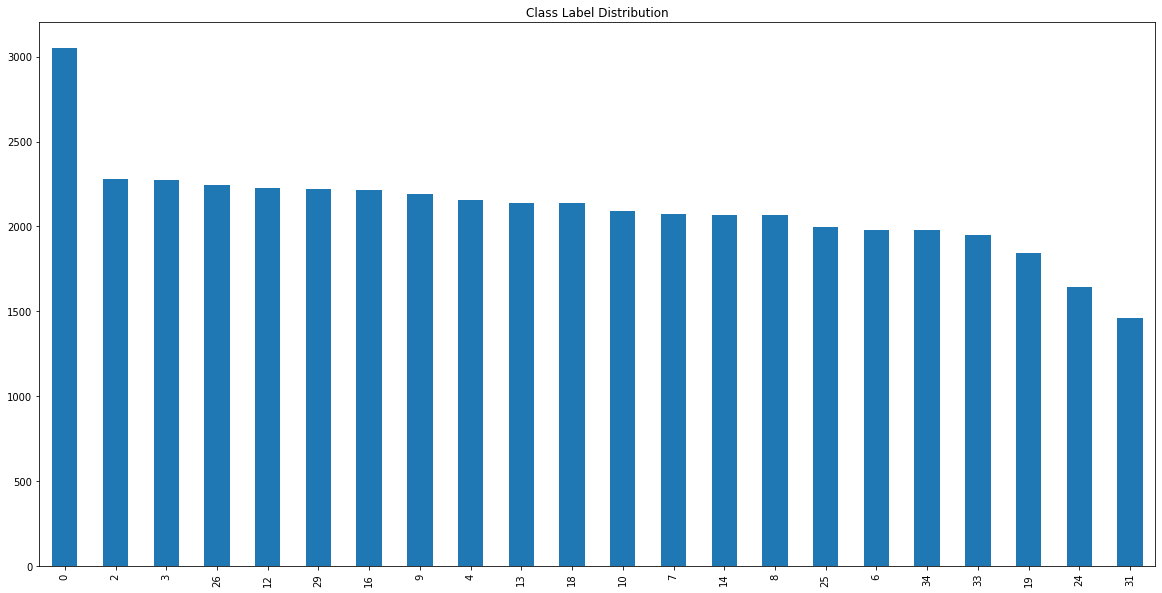

In [140]:
## Visualization of the Class distribution after Augmentation

traintest['Group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

## Deep Learning Models

In [141]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [142]:
## Validating the number of classes 
y_train=onlytrain.Group.values
y_test=onlytest.Group.values
NUM_CLASSES = len(traintest['Group'].value_counts())
print(f"num of target classes == {NUM_CLASSES}")

num of target classes == 22


## Deep Learning Model
### Create Glove Embedding File

In [143]:
try:
    embeddings
except NameError:
  EMBEDDING_FILE = project_path+'resources/glove.6B.300d.txt'
  embeddings = {}
  for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd
        
print('Total number of embedings from glove : ',len(embeddings))

Total number of embedings from glove :  400000


In [144]:
onlytrain.isna().sum()

final_text    0
Group         0
dtype: int64

#### Creating tokenizer and padding sequences to 300 size

In [145]:
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 300 
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token = True,split=(' '))

tokenizer.fit_on_texts(traintest.final_text)

sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
 
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

print('X_Train size ',X_train.shape)



Found 11940 unique tokens.
X_Train size  (45414, 300)


####  Saving Tokenizer to reuse for Model prediction

In [146]:
# Saving the Tokenizer object to be used for productionalizing the model
with open(project_path+'resources/tokenizer.pickle', 'wb') as fh:
  pickle.dump(tokenizer, fh,pickle.HIGHEST_PROTOCOL)

In [147]:
# Loading back the Tokenizer object from filesystem
with open(project_path+'resources/tokenizer.pickle', 'rb') as fh:
  tokenizer = pickle.load(fh)


##### Creating dummies for labels

In [148]:
y_test_r = y_test
y_train=pd.get_dummies(y_train)
print('Training Data : ',X_train.shape)
print('Training labels : ',y_train.shape)
y_test=pd.get_dummies(y_test)
print('Testing Data : ',X_test.shape)
print('Testing Labels : ',y_test.shape)



Training Data :  (45414, 300)
Training labels :  (45414, 22)
Testing Data :  (867, 300)
Testing Labels :  (867, 22)


### Creating the Embedding Matrix

In [149]:
EMBEDDING_DIM = embeddings.get('issue').shape[0]
print("Embedding_dims is : ",EMBEDDING_DIM)
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1 #max_num_words=2000 or unique_tokens =4202
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM)) #MATRIX of 4203 x 200
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings.get(word) ## This references the loaded embeddings dictionary picking up the embeddings and adding to word vector
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print('len Embedding Matrix for first word : ', len(embedding_matrix[1]))

Embedding_dims is :  300
len Embedding Matrix for first word :  300


## NLP Model 
### Model Building

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
#### clearing the cache of the previous models tried
backend.clear_session()
#### variables used for building the model
print("MAX Num Words",MAX_NUM_WORDS)
print('num_words : ',num_words)
print('EMBEDDING_DIM : ',EMBEDDING_DIM)
print('MAX_SEQUENCE_LENGTH : ',MAX_SEQUENCE_LENGTH)
print('NUM_CLASSES : ',NUM_CLASSES)
print("With regularization")
print("Full training")
epochs=50
batch_size=32
print('Epochs : ',epochs)
print('Batch size : ',batch_size)

model = Sequential()
model.add(Embedding(num_words,
                    EMBEDDING_DIM, 
                    input_length=MAX_SEQUENCE_LENGTH, 
                    weights= [embedding_matrix], 
                    trainable=True))
model.add(Dropout(0.5)) 
model.add(Conv1D(64, 5, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(300,return_sequences=True,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.5)) 
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

MAX Num Words 10000
num_words :  10001
EMBEDDING_DIM :  300
MAX_SEQUENCE_LENGTH :  300
NUM_CLASSES :  22
With regularization
Full training
Epochs :  50
Batch size :  32
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          3000300   
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 64)           96064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 75, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 75, 300)           438000    
_________________________________________________________________
dropout_1 (Dropout)

In [151]:
### Fitting/Training the model and saving the history for further use 
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5)

history = model.fit(X_train, y_train.values, 
                    validation_split=0.15,
                    epochs = epochs, batch_size=batch_size,
                    shuffle=True
                    , 
                    callbacks=[es]
                    )



Epoch 1/50
1207/1207 [==============================] - 53s 44ms/step - loss: 0.9367 - accuracy: 0.7177 - val_loss: 1.3821 - val_accuracy: 0.6273
Epoch 2/50
1207/1207 [==============================] - 52s 43ms/step - loss: 0.2687 - accuracy: 0.9256 - val_loss: 1.0556 - val_accuracy: 0.7123
Epoch 3/50
1207/1207 [==============================] - 52s 43ms/step - loss: 0.1705 - accuracy: 0.9564 - val_loss: 0.8030 - val_accuracy: 0.7650
Epoch 4/50
1207/1207 [==============================] - 52s 43ms/step - loss: 0.1336 - accuracy: 0.9677 - val_loss: 0.6752 - val_accuracy: 0.8171
Epoch 5/50
1207/1207 [==============================] - 53s 44ms/step - loss: 0.1062 - accuracy: 0.9762 - val_loss: 0.5594 - val_accuracy: 0.8538
Epoch 6/50
1207/1207 [==============================] - 53s 44ms/step - loss: 0.0985 - accuracy: 0.9795 - val_loss: 0.4278 - val_accuracy: 0.8917
Epoch 7/50
1207/1207 [==============================] - 53s 44ms/step - loss: 0.0813 - accuracy: 0.9843 - val_loss: 0.4368 -

In [152]:
### saving only weights of the model if training is needed in future..
model.save_weights(project_path+'output/lstm.h5')
### saving the entire model including the weights , optimizer, loss function and architecture
model.save(project_path)
#### Evaluating the accuracy of the model
print('Evaluation.....')
score,acc=model.evaluate(X_test, y_test.values)
print('Score :  %.2f' % (score))
print('Accuracy : %.2f' % (acc))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Projects/assets
Evaluation.....
28/28 [==============================] - 0s 9ms/step - loss: 2.6856 - accuracy: 0.6886
Score :  2.69
Accuracy : 0.69


#### Visualisation of the Model performance

#### Model Accuracy

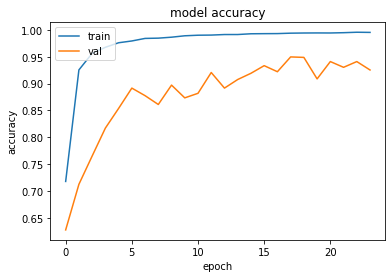

In [153]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()

#### Model Loss 

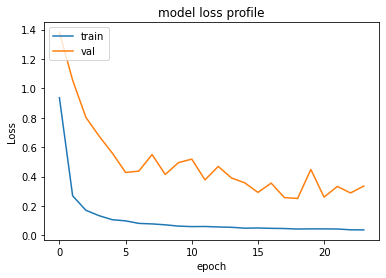

In [154]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss profile')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Running model prediction over entire Test set

In [155]:
y_pred = model.predict(X_test)
print(type(y_pred), type(y_test))
print(y_pred.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
(867, 22) (867, 22)


In [156]:
y_orig = y_test.values

In [157]:
## Values of the prediction and the Original classification.
print(y_pred[1])
print(y_orig[1])

[9.99988556e-01 4.52008521e-07 1.96078489e-07 1.06873586e-08
 4.70429695e-09 1.47488710e-09 1.46270418e-08 1.26440327e-07
 4.88767817e-08 1.57075817e-07 1.97671013e-09 4.05635973e-07
 5.87456235e-08 5.87359583e-09 1.31109209e-06 7.60481598e-08
 6.33925623e-08 2.27929697e-09 2.41142004e-07 7.98211568e-06
 5.58996582e-09 3.43579899e-07]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Printing the Original/Ground truth and Predicted Classification

In [158]:
n = np.random.randint(len(y_test))
#print("Ground Class", np.argmax(y_test, axis=1)[n])
print("Ground Class", np.argmax(y_orig, axis=1)[n])
print("Predicted Class", np.argmax(y_pred, axis=1)[n])

Ground Class 0
Predicted Class 5


### Classification Report

In [159]:
## Classification report

from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_orig, axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       458
           1       0.67      0.33      0.44        36
           2       0.48      0.47      0.47        30
           3       0.27      0.29      0.28        14
           4       0.33      0.18      0.24        11
           5       0.40      0.40      0.40        10
           6       0.83      0.74      0.78        46
           7       0.57      0.36      0.44        11
           8       0.43      0.25      0.32        12
           9       0.68      0.53      0.59        36
          10       0.75      0.71      0.73        21
          11       0.50      0.35      0.41        17
          12       0.56      0.38      0.45        13
          13       0.60      0.23      0.33        13
          14       0.39      0.34      0.37        32
          15       0.81      0.76      0.79        34
          16       0.53      0.47      0.50        17
          17       0.50    

## Overall Summary of various Models, accurracy & F1 score

In [160]:
  from  sklearn.metrics import precision_recall_fscore_support
  def pandas_classification_report(y_true, y_pred):
      metrics_summary = precision_recall_fscore_support(
              y_true=y_true, 
              y_pred=y_pred)

      avg = list(precision_recall_fscore_support(
              y_true=y_true, 
              y_pred=y_pred,
              average='weighted'))

      metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
      class_report_df = pd.DataFrame(
          list(metrics_summary),
          index=metrics_sum_index)

      support = class_report_df.loc['support']
      total = support.sum() 
      avg[-1] = total

      class_report_df['avg / total'] = avg

      return class_report_df.T

In [161]:
df_temp = pandas_classification_report(y_orig.argmax(axis=1), y_pred.argmax(axis=1))
df_temp1 = pd.DataFrame({'Method':['Deep Learning, LSTM'], 'Precision': 
                         [df_temp.loc['avg / total']['precision']], 'recall': 
                         [df_temp.loc['avg / total']['recall']], 'f1-score': 
                         [df_temp.loc['avg / total']['f1-score']]}, index={'1'})
df_result = pd.concat([df_temp1, df_result])
df_result

,Method,Precision,recall,f1-score
1,"Deep Learning, LSTM",0.670922,0.688581,0.669396
5,"TFID Vector, Random Forest",0.596834,0.614719,0.599021
4,"TFID Vector, Decision Tree",0.594391,0.613853,0.599681
3,"Word2Vec, KNN",0.329857,0.487868,0.372857
2,"Word2Vec, Random Forest",0.634344,0.661179,0.588929
1,"Word2Vec, Decision Tree",0.528412,0.525997,0.524520


In [162]:
#### end #####